In [10]:
import os
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import pickle
from tqdm import tqdm
from NegativeClassOptimization import ml #SNN, train_loop, test_loop

In [11]:
targets_balanced_list = ['Q96GD4', 'P49841', 'Q13627', 'P06239', 'Q13464', 'P11309']

In [12]:
def load_custom_data(pkl_path, X_col='X', y_col='Y_binary'):

    df = pd.read_pickle(pkl_path)
    X = np.array(df[X_col].tolist())
    y = np.array(df[y_col].tolist())
    X_tensor = torch.tensor(X, dtype=torch.float32)
    y_tensor = torch.tensor(y, dtype=torch.float32).view(-1, 1)
    dataset = TensorDataset(X_tensor, y_tensor)
    return dataset

#DataLoader(dataset, batch_size=batch_size, shuffle=True)

In [13]:
# Standard parameters
epochs = 10
learning_rate = 0.001 #optimal
optimizer_type = "Adam"
momentum = 0.9
weight_decay = 0
loss_fn = nn.BCELoss()
batch_size = 32
input_dim = 67*100

In [14]:
def train_by_task(task, target, split, num_hidden_units=10, epochs=10, save_model=False):
    path_to_target = Path('./data/processed') / target
    path_vs_task_split = path_to_target / task / f'split_{split}'

    # Loading data
    path_to_train = path_vs_task_split / 'train.pkl'
    path_to_test = path_vs_task_split / 'test.pkl'

    dataset_train = load_custom_data(path_to_train)
    dataset_test = load_custom_data(path_to_test)

    train_loader = DataLoader(dataset_train, batch_size=batch_size, shuffle=True)
    test_loader = DataLoader(dataset_test, batch_size=batch_size, shuffle=False)

    # Model
    model = ml.SNN(num_hidden_units=10, input_dim=input_dim)

    train_output = ml.train_for_ndb1(
        epochs=epochs,
        learning_rate=learning_rate,
        train_loader=train_loader,
        test_loader=test_loader,
        open_loader=None,
        model=model,
        optimizer_type=optimizer_type,
        momentum=momentum,
        swa=True
    )
    swa_model, model, online_metrics = train_output

    # Saving model
    if save_model:
        trained_model_dir = path_vs_task_split / "ml_models"
        trained_model_dir.mkdir(parents=True, exist_ok=True)
        torch.save(model.state_dict(), trained_model_dir / f"SN{num_hidden_units}.pt")
        torch.save(swa_model.state_dict(), trained_model_dir / f"swa_SN{num_hidden_units}.pt")

    return online_metrics


In [9]:
RUN_MODELS_TRAINING = False
if RUN_MODELS_TRAINING:
    task = "vs_Weak"
    for target in targets_balanced_list:
        for split in [0,1,2,42]:
            online_metrics = train_by_task(task, target, split, save_model=True)

    task = "vs_Non-binder"
    for target in targets_balanced_list:
        for split in [0,1,2,42]:
            online_metrics = train_by_task(task, target, split, save_model=True)

    task = "vs_all"
    for target in targets_balanced_list:
        for split in [0,1,2,42]:
            online_metrics = train_by_task(task, target, split, save_model=True)
    
    task = "shuffled_Weak"
    for target in targets_balanced_list:
        for split in [0,1,2,42]:
            online_metrics = train_by_task(task, target, split, save_model=True)

/opt/homebrew/anaconda3/envs/nco/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/envs/nco/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/envs/nco/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/envs/nco/lib/python3.8/site-packages/skl

In [15]:
task = "shuffled_Weak"
for target in targets_balanced_list:
    for split in [0,1,2,42]:
        online_metrics = train_by_task(task, target, split, save_model=True)

/opt/homebrew/anaconda3/envs/nco/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/envs/nco/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/envs/nco/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/envs/nco/lib/python3.8/site-packages/skl

In [6]:
#optimal hyperparameters
#not sure if it's optimal anymore
RUN_MODELS_TRAINING = False
batch_size = 8
epochs = 20
if RUN_MODELS_TRAINING:
    task = "vs_Weak"
    for target in targets_balanced_list:
        for split in [0,1,2,42]:
            online_metrics = train_by_task(task, target, split, num_hidden_units=20, save_model=True)

    task = "vs_Non-binder"
    for target in targets_balanced_list:
        for split in [0,1,2,42]:
            online_metrics = train_by_task(task, target, split, num_hidden_units=20, save_model=True)

    task = "vs_all"
    for target in targets_balanced_list:
        for split in [0,1,2,42]:
            online_metrics = train_by_task(task, target, split, num_hidden_units=20, save_model=True)

/opt/homebrew/anaconda3/envs/nco/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/envs/nco/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [329]:
task = "vs_Weak"
online_metrics = train_by_task(task, "Q96GD4", 0)

Epoch 1
-------------------------------
loss: 0.692573  [    0/  523]
Test Error: 
 Acc: 49.6 Avg loss: 0.691297 

Epoch 2
-------------------------------
loss: 0.686619  [    0/  523]
Test Error: 
 Acc: 51.1 Avg loss: 0.690807 

Epoch 3
-------------------------------
loss: 0.636019  [    0/  523]
Test Error: 
 Acc: 52.7 Avg loss: 0.691124 

Epoch 4
-------------------------------
loss: 0.622603  [    0/  523]
Test Error: 
 Acc: 50.4 Avg loss: 0.694194 

Epoch 5
-------------------------------
loss: 0.574731  [    0/  523]
Test Error: 
 Acc: 48.9 Avg loss: 0.693861 

Epoch 6
-------------------------------
loss: 0.586844  [    0/  523]
Test Error: 
 Acc: 47.3 Avg loss: 0.703463 

Epoch 7
-------------------------------
loss: 0.496867  [    0/  523]
Test Error: 
 Acc: 50.4 Avg loss: 0.694652 

Epoch 8
-------------------------------
loss: 0.410560  [    0/  523]
Test Error: 
 Acc: 49.6 Avg loss: 0.729093 

Epoch 9
-------------------------------
loss: 0.435339  [    0/  523]
Test Error

In [331]:
online_metrics
#plot loss for train and test for each epoch
train_losses = [epoch["train_losses"][0] for epoch in online_metrics]
test_losses = [epoch["test_metrics"]["test_loss"] for epoch in online_metrics]
test_accs = [epoch["test_metrics"]["acc_closed"] for epoch in online_metrics]

Text(0, 0.5, 'Loss')

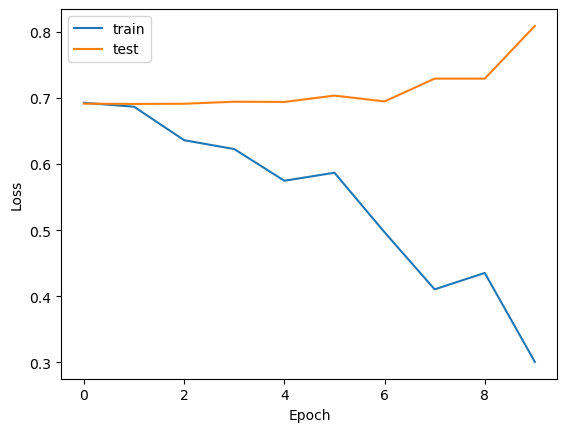

In [333]:
plt.plot(train_losses, label="train")
plt.plot(test_losses, label="test")
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Loss")

Text(0, 0.5, 'Accuracy')

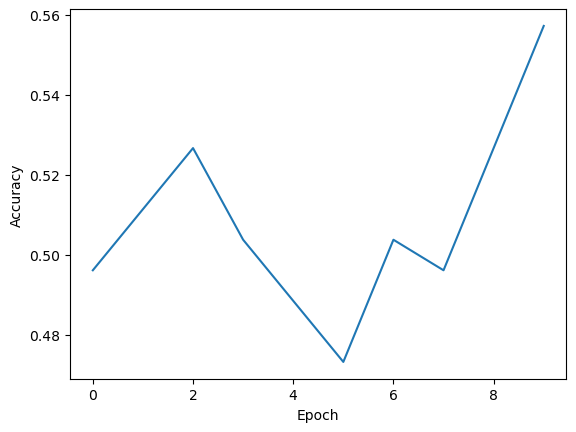

In [335]:
plt.plot(test_accs, label="test acc")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")

In [18]:
task = "vs_Weak"
online_metrics_25 = train_by_task(task, "Q96GD4", 0, epochs=25, save_model=False)

In [22]:
test_accs_25 = [epoch["test_metrics"]["acc_closed"] for epoch in online_metrics_25]
test_losses_25 = [epoch["test_metrics"]["test_loss"] for epoch in online_metrics_25]
train_losses_25 = [epoch["train_losses"][0] for epoch in online_metrics_25]

Text(0, 0.5, 'Loss')

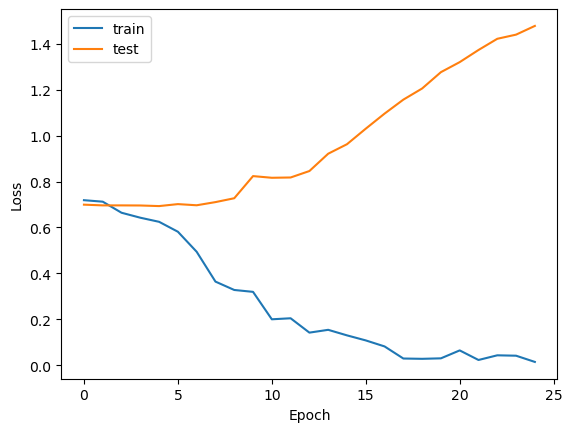

In [23]:
plt.plot(train_losses_25, label="train")
plt.plot(test_losses_25, label="test")
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Loss")

Text(0, 0.5, 'Accuracy')

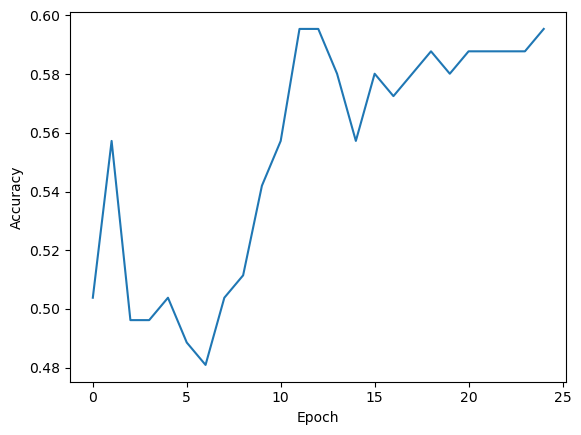

In [25]:
plt.plot(test_accs_25, label="test acc")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")